In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
movies=pd.read_csv(r"/content/sample_data/movies.csv")

In [8]:
ratings=pd.read_csv(r"/content/sample_data/ratings.csv")

In [9]:
tags=pd.read_csv(r"/content/sample_data/tags.csv")

In [10]:
links=pd.read_csv(r"/content/sample_data/links.csv")

#### What is the shape of "movies.csv"?

In [14]:
movies.shape

(9742, 3)

#### What is the shape of "reviews.csv"?

In [15]:
ratings.shape

(100836, 4)

### How many unique "userId" are available in "ratings.csv"?

In [16]:
ratings['userId'].nunique()

610

### Which movie has recieved maximum number of user ratings?


In [19]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
movie_ratings=pd.merge(movies,ratings, on='movieId',how='inner')

In [22]:
movie_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [23]:
count=movie_ratings.groupby(['movieId'])['rating'].count()

print(count.max())
movies[movies['movieId'] == count.idxmax()]['title']

329


,title
314,Forrest Gump (1994)


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [24]:
movie_id=movies[movies['title']=='Matrix, The (1999)']['movieId'].values[0]
tags[tags['movieId']==movie_id]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [25]:
movie_id=movies[movies['title']=='Terminator 2: Judgment Day (1991)']['movieId'].values[0]
mv_rating=ratings[ratings['movieId']==movie_id]
mv_rating['rating'].mean()

3.970982142857143

### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<Axes: ylabel='Density'>

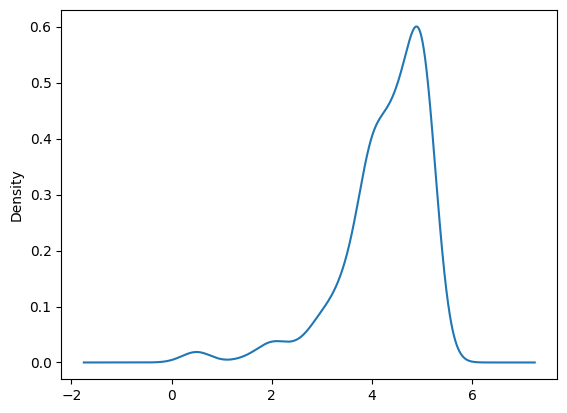

In [26]:
mv_id=movies[movies['title']=="Fight Club (1999)"]['movieId'].values[0]
fight_club=ratings[ratings['movieId']==mv_id]
fight_club['rating'].plot(kind='kde')

### Which movie is the most popular based on average user ratings?

In [28]:
avg_ratings=ratings.groupby(['movieId'])['rating'].agg(['count','mean']).reset_index()
merged_df=pd.merge(movies,avg_ratings)
filter_df=merged_df[merged_df['count']>50]
filter_df.loc[filter_df['mean'].idxmax()]

,277
movieId,318
title,"Shawshank Redemption, The (1994)"
genres,Crime|Drama
count,317
mean,4.429022


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [29]:
merged_df.sort_values(by='count',ascending=False).head()

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [30]:
ratings.groupby(['movieId'])['rating'].count().reset_index()

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [31]:
sci_fi=movies[movies['genres'].str.contains('Sci-Fi')]
rating_count=ratings.groupby(['movieId'])['rating'].count().reset_index()
df=pd.merge(sci_fi, rating_count).sort_values(by='rating',ascending=False)
df.iloc[2]

,25
movieId,480
title,Jurassic Park (1993)
genres,Action|Adventure|Sci-Fi|Thriller
rating,238


### Mention the movieId of the movie which has the highest IMDB rating.

In [32]:
links.loc[links['imdbId'].idxmax()]

,9740
movieId,193587.0
imdbId,8391976.0
tmdbId,483455.0


### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [33]:
df=pd.merge(movies, links, on='movieId')
sci_fi=df[df['genres']=='Sci-Fi']
sci_fi.loc[sci_fi['imdbId'].idxmax()]

,8211
movieId,103596
title,Sharknado (2013)
genres,Sci-Fi
imdbId,2724064
tmdbId,205321.0


## Web Scapping

In [36]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

# Assuming 'filtered_movies' DataFrame contains movies with more than 50 user ratings
# Assuming 'links_df' DataFrame contains movieId, imdbId, tmdbId

# movies_with_imdb_ids = pd.merge(filtered_movies, link, on='movieId', how='inner')

all_reviews = []

# Function to scrape IMDB reviews for a movie given its IMDB ID
def scrapper(imdb_id):
    id_str = str(int(imdb_id))
    n_zeroes = 7 - len(id_str)
    new_id = "0" * n_zeroes + id_str
    URL = f"https://www.imdb.com/title/tt{new_id}/reviews"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all review containers
    review_containers = soup.find_all('div', class_='text show-more__control')  # Update this class to the actual review container class

    reviews = [container.text.strip() for container in review_containers]
    return reviews

# Iterate through movies with IMDB IDs and scrape reviews
# for index, row in movies_with_imdb_ids.iterrows():
    imdb_id = row['imdbId']
    movie_reviews = scrapper(imdb_id)
    all_reviews.extend(movie_reviews)

# Create a DataFrame from the collected reviews
reviews_df = pd.DataFrame({'IMDB_Reviews': all_reviews})